# Forecasting Financial Development and institutional depth indicators

### Abbreviations
##### Financial Development Indicator
- <b>IFD</b>: Index of Financial Development

##### Institutional Depth Indicators
- <b>DMB</b>: Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets (%)
- <b>LL</b>: Liquid Liabilities to GDP (%)
- <b>CBA</b>: Central Bank Assets to GDP (%)

## 1. Analyzing the Time Series Characteristics

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
pd.set_option('display.float_format', '{:.8f}'.format)
import statsmodels.api as sm

sns.set(style="ticks", color_codes=True)

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (7, 5)

import warnings
warnings.filterwarnings("ignore")

color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan"
]


In [2]:
# Loading the data
filepath = '../Data/Time_Series.csv'
df = pd.read_csv(filepath, parse_dates=['YEAR'], index_col='YEAR')
print(df.shape)  # (22, 9)
df

(38, 4)


,IFD,DMB,LL,CBA
YEAR,,,,
1980-01-01,0.30000000,74.81487000,31.38003000,8.16690400
1981-01-01,0.31000000,72.35162000,31.77861000,9.52902700
1982-01-01,0.32000000,70.69227000,32.60682000,10.70080000
1983-01-01,0.33000000,70.37652000,33.23505000,11.24133000
1984-01-01,0.34000000,70.79354000,34.74178000,11.80835000
1985-01-01,0.34000000,69.71903000,35.92885000,12.67827000
1986-01-01,0.36000000,68.83478000,37.88611000,13.70963000
1987-01-01,0.35000000,68.94717000,38.86379000,13.99438000
1988-01-01,0.35000000,69.03013000,38.55345000,13.75542000


In [3]:
df.describe()

,IFD,DMB,LL,CBA
count,38.00000000,38.00000000,38.00000000,38.00000000
mean,0.38026316,82.59230447,51.62424211,7.86468413
std,0.05553119,11.17465383,15.35720469,4.25179705
min,0.28000000,67.97147000,31.38003000,1.78764300
25%,0.34000000,70.71758750,38.96441250,4.49379125
50%,0.40000000,80.95071000,45.34320000,7.98524100
75%,0.42000000,93.89743000,68.45201250,11.66659500
max,0.49000000,97.21568000,74.82947000,14.47429000


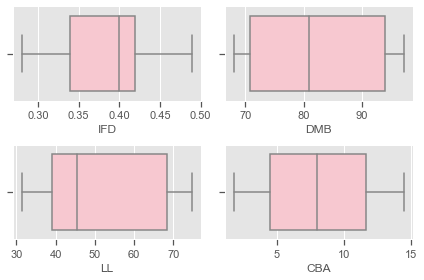

In [4]:
names = list(df.columns)
f, axes = plt.subplots(round(len(names)/2), 2)
y = 0;
for name in names:
    i, j = divmod(y, 2)
    sns.boxplot(x=df[name], color=color_list[6], ax=axes[i, j])
    y = y + 1

plt.tight_layout()

plt.show()


As we can see, there are no outliers in the data.

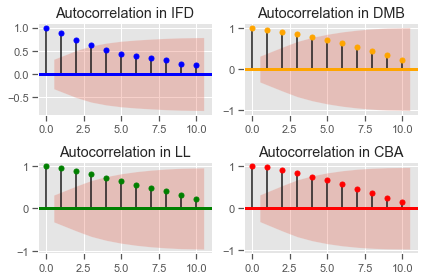

In [5]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
f, axes = plt.subplots(2, 2, squeeze=False)
y=0
for i, ax in enumerate(axes.flatten()):
    c, d = divmod(y, 2)
    data = df[df.columns[i]]
    plot_acf(data, color=color_list[i%(len(color_list))], linewidth=3, lags=10, ax=axes[c, d])
    ax.set_title('Autocorrelation in '+df.columns[i])
    y = y + 1

plt.tight_layout()
plt.show()

### Visualize the Time Series

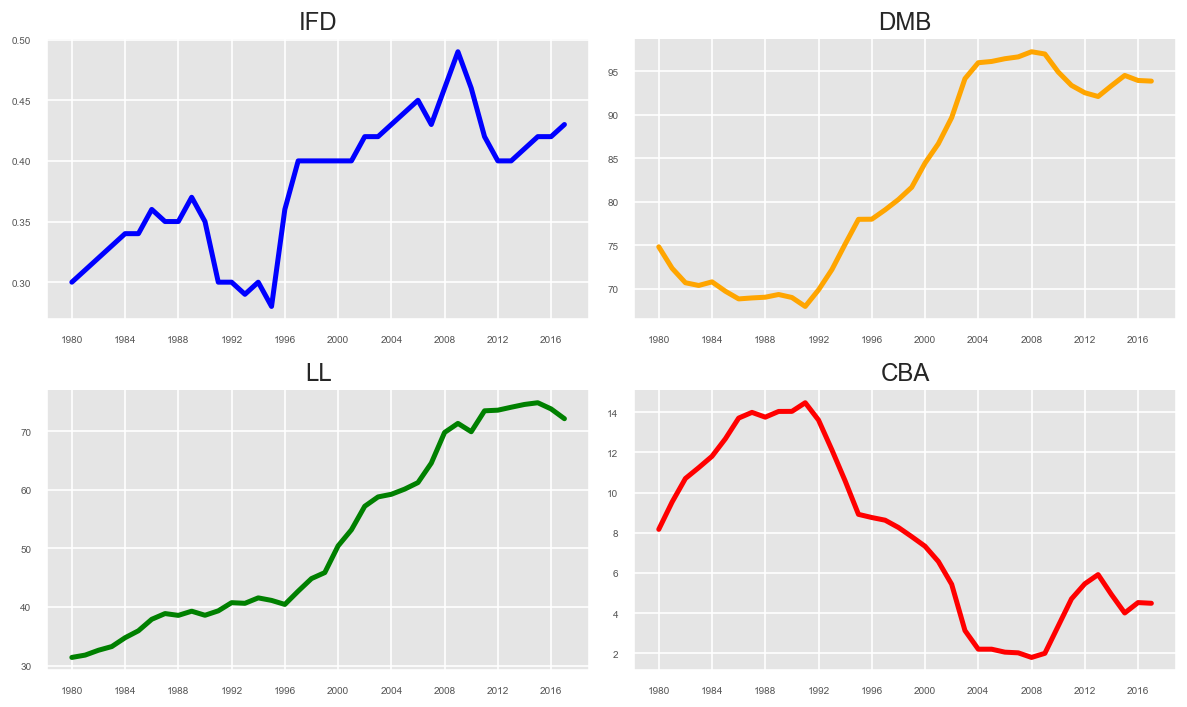

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color=color_list[i%(len(color_list))], linewidth=3)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

<Figure size 144x216 with 0 Axes>

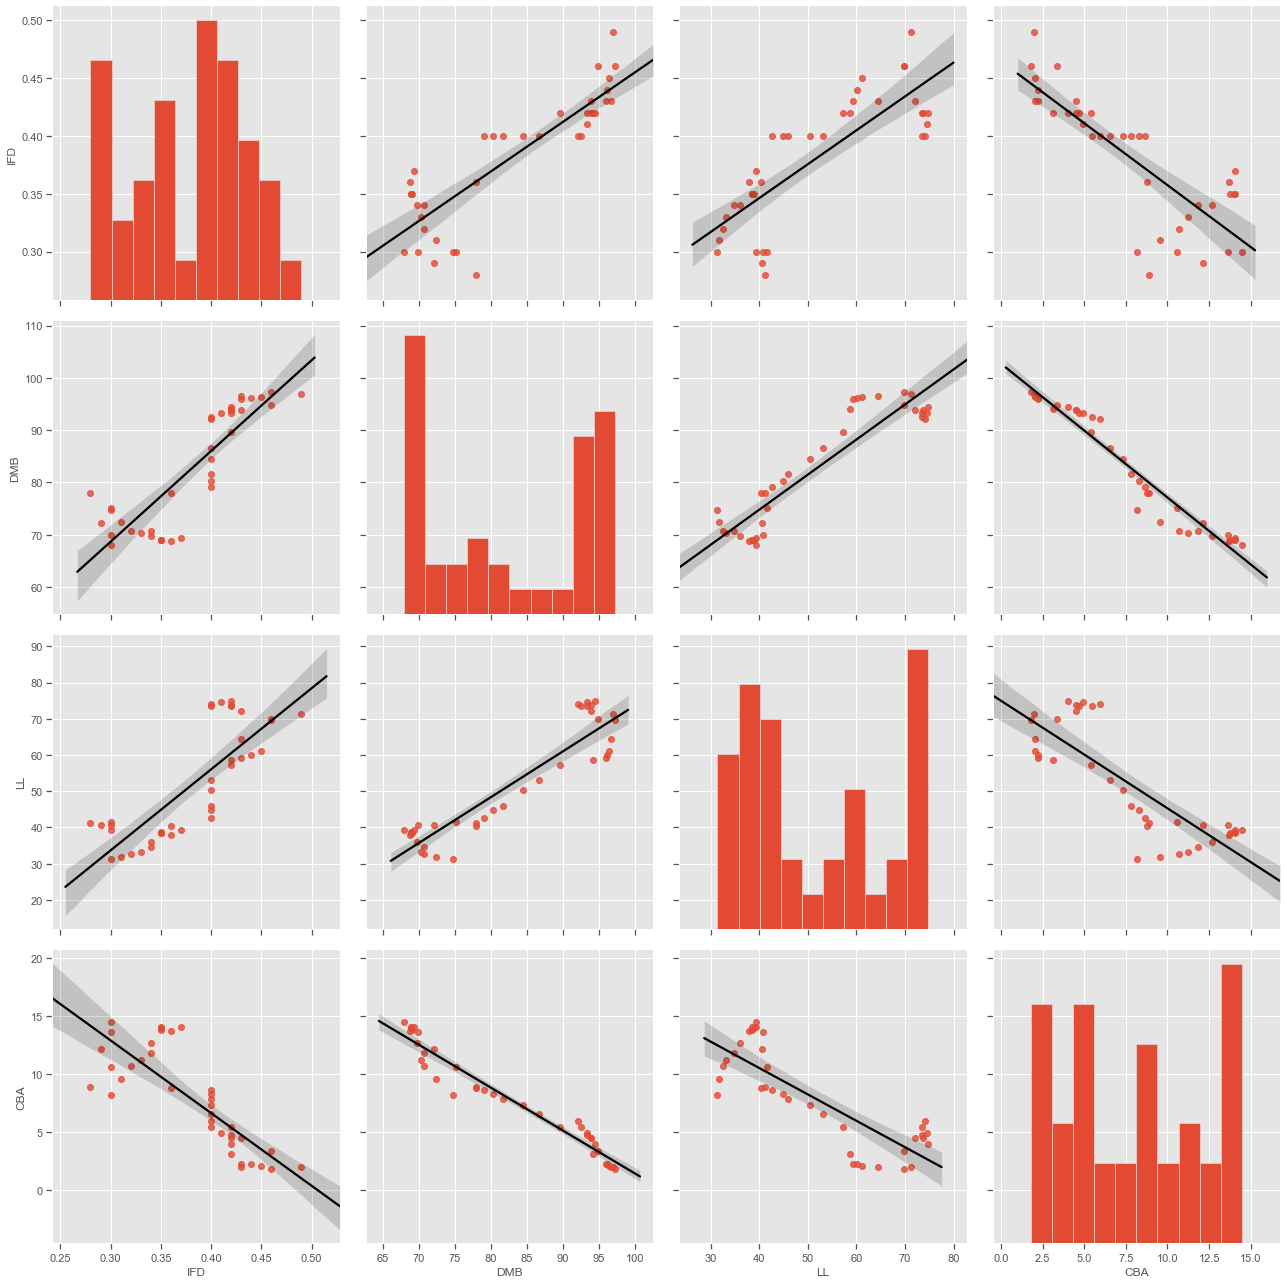

In [7]:
plt.figure(figsize=(2,3))
sns.pairplot(df, height=4.5, kind="reg", plot_kws={'line_kws':{'color':'black'}})
plt.show()

(0, 4)

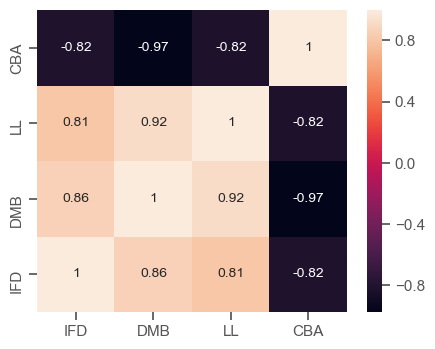

In [8]:
plt.figure(figsize=(5,4), dpi=100)
hp = sns.heatmap(df.corr(), annot=True)
hp.set_ylim(0,4)

## 2. Test for causation amongst the time series

Next step in the analysis is to check for causality amongst these series. The Granger’s Causality test and the Cointegration test can help us with that.

### Granger’s Causality Test

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

###### Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (X) do not cause the other series (Y)

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,IFD_x,DMB_x,LL_x,CBA_x
IFD_y,1.00000000,0.00000000,0.03840000,0.00010000
DMB_y,0.10730000,1.00000000,0.01390000,0.00000000
LL_y,0.00370000,0.00000000,1.00000000,0.00000000
CBA_y,0.07350000,0.00000000,0.00000000,1.00000000


The row are the Response (Y) and the columns are the predictor series (X).

For example, if you take the value 0.0384 in (row 1, column 3), it refers to the p-value of LL_x causing IFD_y. Whereas, the 0.1073 in (row 2, column 1) refers to the p-value of DMB_y causing IFD_x.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.0384 at (row 1, column 2) represents the p-value of the Grangers Causality test for LL_x causing IFD_y, which is less that the significance level of 0.05.

###### So, you can reject the null hypothesis and conclude LL_x causes IFD_y.

Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, let’s do the Cointegration test.

### Cointegration Test

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

To understand this test, you first need to know what is ‘order of integration’ (d).

#### Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

Now, when you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

When two or more time series are cointegrated, <b>it means they have a long run, statistically significant relationship.</b>

This is the basic premise on which `Vector Autoregression(VAR)` models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

###### Soren Johanssen in his paper (1991) devised a procedure to implement the cointegration test.

In [10]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
IFD    ::  91.55     > 40.1749   =>   True
DMB    ::  50.8      > 24.2761   =>   True
LL     ::  18.29     > 12.3212   =>   True
CBA    ::  1.68      > 4.1296    =>   False


## 3. Prepare training and test datasets

The VAR model will be fitted on `df_train` and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics.

In [11]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (34, 4)
print(df_test.shape)  # (4, 4)

(34, 4)
(4, 4)


## 4. Test for stationarity

Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

So, how to test for stationarity?

There is a suite of tests called unit-root tests. The popular ones are:

- Augmented Dickey-Fuller Test (ADF Test)
- KPSS test
- Philip-Perron test

Let’s use the ADF test for our purpose.

By the way, if a series is found to be non-stationary, you make it stationary by differencing the series once and repeat the test again until it becomes stationary.

Since, differencing reduces the length of the series by 1 and since all the time series has to be of the same length, you need to difference all the series in the system if you choose to difference at all.

Got it?

Let’s implement the ADF Test.

First, we implement a nice function `adfuller_test()` that writes out the results of the ADF test for any given time series and implement this function on each series one-by-one.

In [12]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

Call the `adfuller_test()` on each series.

In [13]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IFD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5446
 No. Lags Chosen       = 0
 Critical value 1%     = -3.646
 Critical value 5%     = -2.954
 Critical value 10%    = -2.616
 => P-Value = 0.5114. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "DMB" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7272
 No. Lags Chosen       = 9
 Critical value 1%     = -3.738
 Critical value 5%     = -2.992
 Critical value 10%    = -2.636
 => P-Value = 0.0694. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

The ADF test confirms all of the time series are non-stationary. Let’s difference all of them once and check again.

## 5. Transform the series to make it stationary, if needed

In [14]:
# 1st difference
df_differenced = df_train.diff().dropna()

Re-run ADF test on each differenced series.

In [15]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IFD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.616
 No. Lags Chosen       = 0
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DMB" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8274
 No. Lags Chosen       = 5
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.3669. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

After the first difference, DMB is still not stationary.

All of the series in the VAR model should have the same number of observations.

So, we are left with one of two choices.

That is, either proceed with 1st differenced series or difference all the series one more time.

In [16]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

Re-run ADF test again on each second differenced series.

In [17]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IFD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3271
 No. Lags Chosen       = 2
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DMB" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9227
 No. Lags Chosen       = 4
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.3214. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

## 6. Find optimal order (p) of VAR Model

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the `AIC`, you can also check other best fit comparison estimates of `BIC`, `FPE` and `HQIC`.

In [18]:
model = VAR(df_differenced, freq="AS-JAN")
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -8.055120059640137
BIC :  -7.12996702448843
FPE :  0.0003211015792770839
HQIC:  -7.753543238552558 

Lag Order = 2
AIC :  -7.4897659918814
BIC :  -5.808329133886814
FPE :  0.0006029904744725285
HQIC:  -6.9518598941977 

Lag Order = 3
AIC :  -7.46690780000595
BIC :  -5.015204932443997
FPE :  0.0007519873075737072
HQIC:  -6.699065048869037 

Lag Order = 4
AIC :  -7.958246665428857
BIC :  -4.722892855003362
FPE :  0.0007614236489426129
HQIC:  -6.969166751023312 

Lag Order = 5
AIC :  -10.030969975964886
BIC :  -5.999477503951416
FPE :  0.00035783948734873406
HQIC:  -8.83219591908163 



In the above output, the AIC drops to lowest at lag 1, then increases till lag 3 and then continuously drops further.

Let’s go with the lag 1 model.

An alternate method to choose the order(p) of the VAR models is to use the `model.select_order(maxlags)` method.

## 7. Training the model

In [19]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Apr, 2021
Time:                     01:35:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.12997
Nobs:                     31.0000    HQIC:                  -7.75354
Log likelihood:          -31.0940    FPE:                0.000321102
AIC:                     -8.05512    Det(Omega_mle):     0.000176555
--------------------------------------------------------------------
Results for equation IFD
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.000284         0.005280           -0.054           0.957
L1.IFD        -0.294610         0.171914           -1.714           0.087
L1.DMB        -0.022777         0.011088           -2.054           0.040
L1.LL          0

In [20]:
# Plot the Correlation matrix of residuals
dex = {'IFD':[1.000000, -0.045383, 0.103186, 0.091193],
        'DMB':[-0.045383, 1.000000, 0.478100, -0.900792],
         'LL': [0.103186, 0.478100, 1.000000, -0.274649],
        'CBA': [0.091193, -0.900792, -0.274649, 1.000000]
      }
  
# Creates pandas DataFrame.
dfq = pd.DataFrame(dex, index =['IFD',
                                'DMB',
                                'LL',
                                'CBA'])
  
# print the data
dfq

,IFD,DMB,LL,CBA
IFD,1.00000000,-0.04538300,0.10318600,0.09119300
DMB,-0.04538300,1.00000000,0.47810000,-0.90079200
LL,0.10318600,0.47810000,1.00000000,-0.27464900
CBA,0.09119300,-0.90079200,-0.27464900,1.00000000


(0, 4)

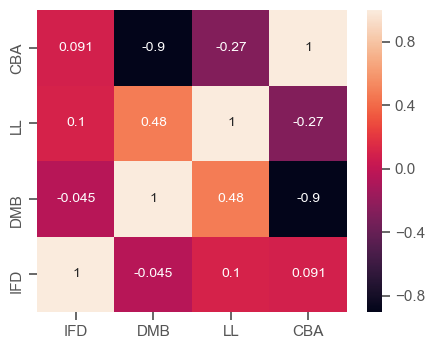

In [21]:
plt.figure(figsize=(5,4), dpi=100)
hp = sns.heatmap(dfq, annot=True)
hp.set_ylim(0,4)

### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

The value of this statistic can vary between 0 and 4. <b>The closer it is to the value 2, then there is no significant serial correlation.</b> The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [22]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

IFD : 2.28
DMB : 1.95
LL : 2.21
CBA : 1.84


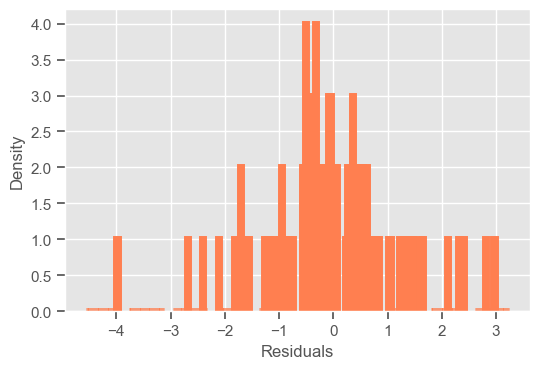

In [23]:
residuals = model_fitted.resid
plt.figure(1, dpi=100)
plt.hist(residuals,10,edgecolor='coral',linewidth=5)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


We see that the distribution of the residuals looks like a bell-shape although we also find that there are some outliers which might lead to skewness. 

The serial correlation seems quite alright. Let’s proceed with the forecast.

### Impulse Response Analysis

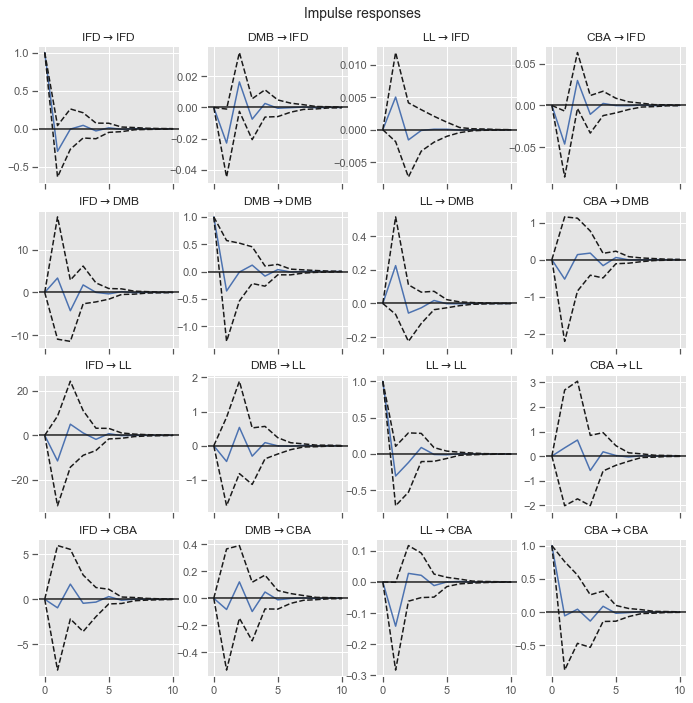

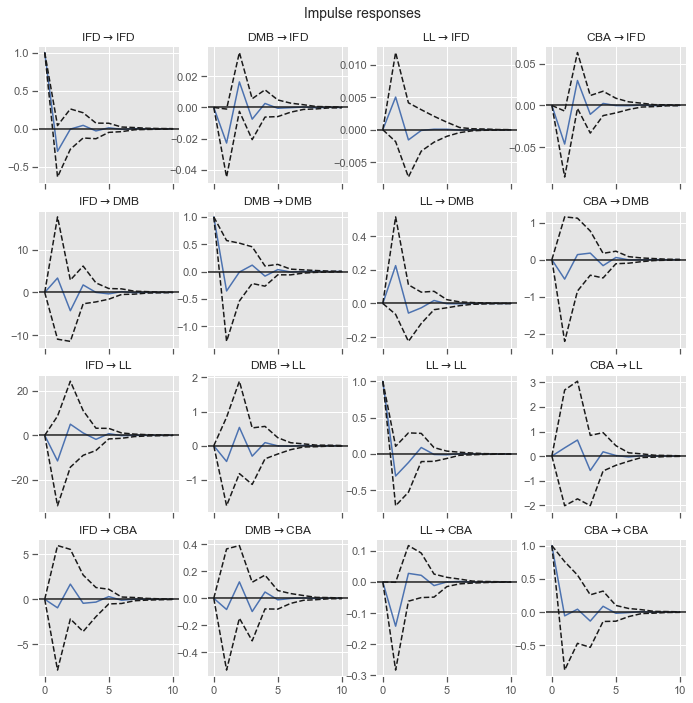

In [24]:
# Impulse Response Analysis
irf = model_fitted.irf(10)
irf.plot()

Given the parameter estimates and the Johannsen Cointegration test results, the linkages between the series are established here. It can be seen that, the responses to the shocks are captured here, and they die down to almost after 7th lag.

### Forecast Error Variance Decomposition

###### In a FEVD, forecast errors are considered for each equation in the fitted VAR model, then the fitted VAR model is used to determine how much of each error realization is coming from unexpected changes (forecast errors) in the other variable.

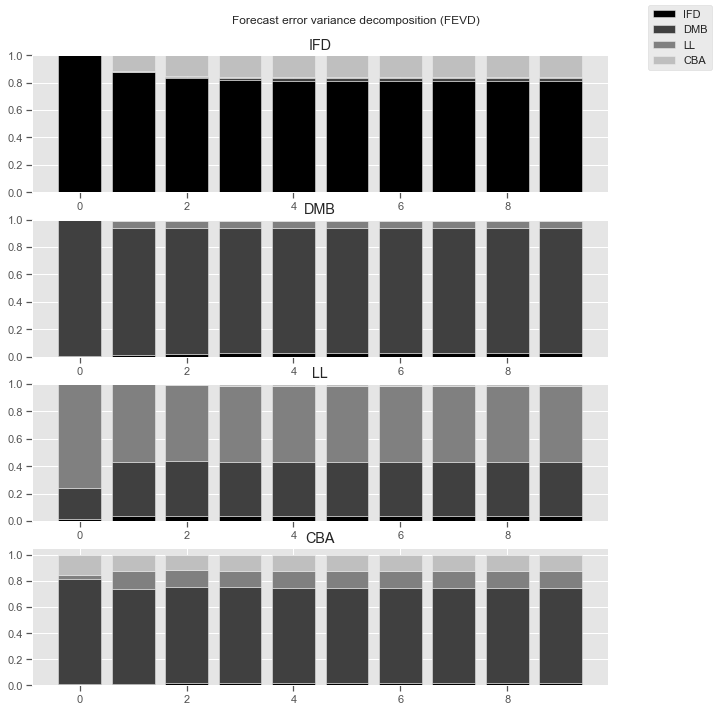

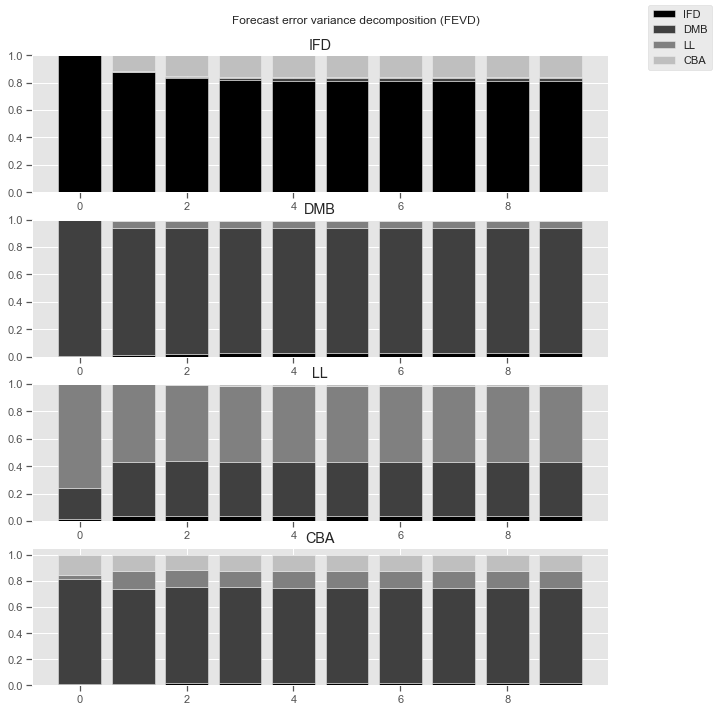

In [25]:
fev = model_fitted.fevd(10)
fev.plot()

### Forecasting using statsmodels

In order to forecast, the VAR model expects up to the lag order number of observations from the past data.

This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [26]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

1


array([[ 0.02    ,  0.41243 ,  0.39706 , -0.291261]])

In [27]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,IFD_2d,DMB_2d,LL_2d,CBA_2d
YEAR,,,,
2014-01-01,-0.00008915,0.21625744,-0.63117558,-0.11517390
2015-01-01,-0.00302202,-0.10622487,0.06016484,0.05643810
2016-01-01,0.00071462,0.06480642,0.09052809,-0.02211164
2017-01-01,-0.00049217,0.06458512,-0.06666441,-0.03969435


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In this case it is two times.

## 8. Rolling back the transformations to get real forecast

In [28]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [29]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['IFD_forecast', 'DMB_forecast', 'LL_forecast', 'CBA_forecast']]

,IFD_forecast,DMB_forecast,LL_forecast,CBA_forecast
YEAR,,,,
2014-01-01,0.39991085,91.85812744,73.93468442,6.25849710
2015-01-01,0.39679969,91.53558002,73.86731369,6.65946729
2016-01-01,0.39440315,91.27783902,73.89047104,7.03832584
2017-01-01,0.39151443,91.08468314,73.84696399,7.37749005


The forecasts are back to the original scale. Let’s plot the forecasts against the actuals from test data.

## 9. Plot of Forecast vs Actuals

In [30]:
row = df_train.tail(1)
row.columns = ['IFD_forecast', 'DMB_forecast', 'LL_forecast', 'CBA_forecast']
# row
# pd.concat([pd.DataFrame(row), df_results], ignore_index=True)
# df_results
dfres = pd.DataFrame(df_results)
cols = [5,7,9,11]
dfres = dfres[dfres.columns[cols]]
# dfres
ress = pd.concat([pd.DataFrame(row), dfres])
# ress

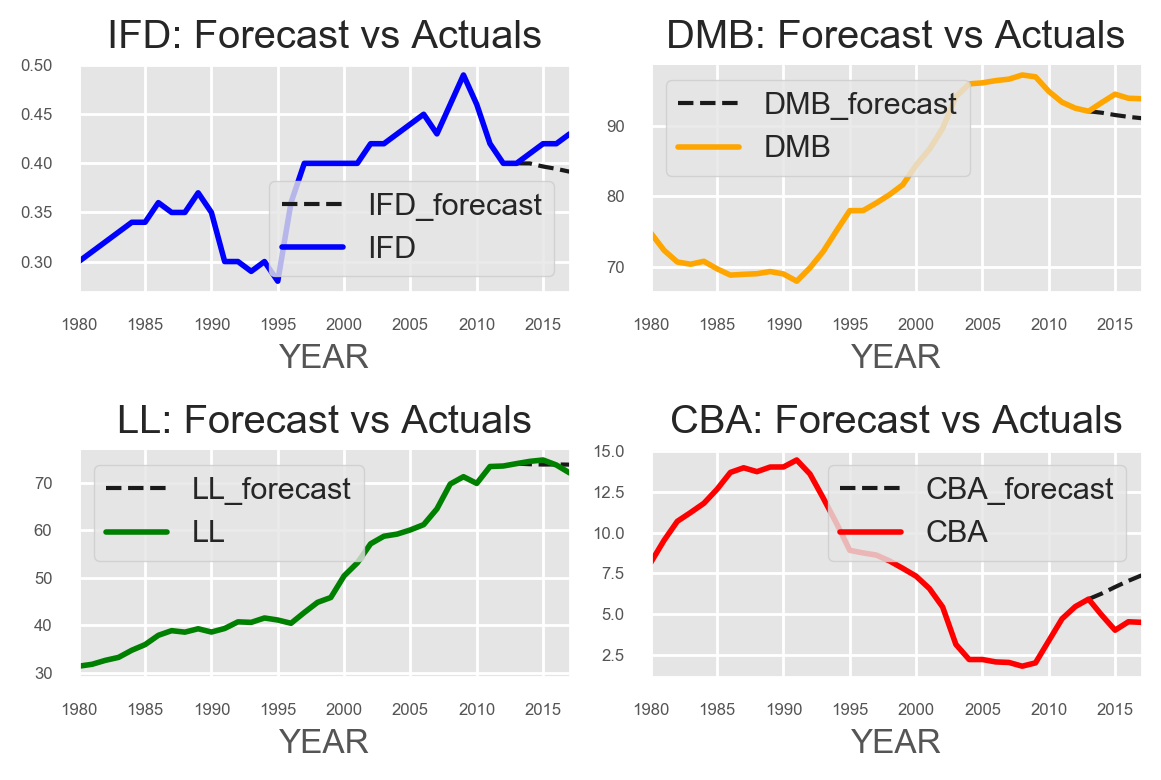

In [31]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=200)
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    ress[col+'_forecast'].plot(legend=True, ax=ax, style='--', color='k').autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax, color=color_list[i%(len(color_list))], linewidth=2).autoscale(axis='x',tight=True)
#     df_test[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## 10. Evaluating the Forecasts

To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the `MAPE`, `ME`, `MAE`, `MPE`, `RMSE` and `corr`.

In [32]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

print('Forecast Accuracy of: IFD')
accuracy_prod = forecast_accuracy(df_results['IFD_forecast'].values, df_test['IFD'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: DMB')
accuracy_prod = forecast_accuracy(df_results['DMB_forecast'].values, df_test['DMB'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: LL')
accuracy_prod = forecast_accuracy(df_results['LL_forecast'].values, df_test['LL'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: CBA')
accuracy_prod = forecast_accuracy(df_results['CBA_forecast'].values, df_test['CBA'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: IFD
mape :  0.0576
me :  -0.0243
mae :  0.0243
mpe :  -0.0576
rmse :  0.0263
corr :  -0.9614

Forecast Accuracy of: DMB
mape :  0.0261
me :  -2.4521
mae :  2.4521
mpe :  -0.0261
rmse :  2.5214
corr :  -0.352

Forecast Accuracy of: LL
mape :  0.0117
me :  0.0733
mae :  0.8555
mpe :  0.0012
rmse :  1.0409
corr :  0.5993

Forecast Accuracy of: CBA
mape :  0.5345
me :  2.3514
mae :  2.3514
mpe :  0.5345
rmse :  2.4269
corr :  -0.293
